# ChickenScratch.Interactive

## Add ChickenScratch.Interactive to your Polyglot Notebook

In [1]:
#r "nuget: ChickenScratch.Interactive"
open ChickenScratch

Installed Packages ChickenScratch.Interactive, 1.1.0

Loading extension script from `C:\Users\dave\.nuget\packages\chickenscratch.interactive\1.1.0\interactive-extensions\dotnet\extension.dib`

## Creating Html

### Basic Html

In [2]:
module Sample1 =
    open ChickenScratch.HtmlExpressions

    let doc = div {
        _style "border: solid 3px green ; background-color: lightgray ; color: black; padding: 10px"        
        
        h1 { "Welcome to Chicken Scratch" }

        ul {
            li { "Simple DSL for creating HTML" }
            li { "Include" ; strong { "IScratchNodeSource" } ; "types directly in your Html exressions" } 
            li { "Add content from files, strings, streams, or resources" }    
            li { "Add Base64 encoded images" }       
        }        
    }

Sample1.doc

Welcome to Chicken Scratch 
 
 Simple DSL for creating HTML 
 
 Include
 IScratchNodeSource 
 types directly in your Html exressions
 
 Add content from files, strings, streams, or resources 
 Add Base64 encoded images

In [3]:
printfn "%A" Sample1.doc

<div style="border: solid 3px green ; background-color: lightgray ; color: black; padding: 10px">
    <h1>Welcome to Chicken Scratch</h1>
    <ul>
        <li>Simple DSL for creating HTML</li>
        <li>
            Include
            <strong>IScratchNodeSource</strong>
            types directly in your Html exressions
        </li>
        <li>Add content from files, strings, streams, or resources</li>
        <li>Add Base64 encoded images</li>
    </ul>
</div>


Attributes (such `_style`, `_class`, and `_height`) are prefixed with an underscore character.  Tags (such as `div`, `table`, and `h1`) and events (such as `onclick`, `onmouseup`, and `onscroll`) are not.  All are contained within the `HtmlExpressions` module.  It is recommended that you open that module only within a limited scope to prevent common name collisions.

Tags, attributes, and events can be found in the `Tags`, `Attributes`, and `Events` modules respectively.  Those modules are auto-opened with the `HtmlExpressions` module so you generally don't need to specify them, but if you are having trouble remembering exactly what that event you need is called, type `Events.` and let your code completion tool help you find it.

All string content will be encoded.  Use `RawContent` if you want to avoid encoding.

Be careful to keep your style selectors local to only the content you want to modify, or you may end up affecting other output in the notebook.

In [4]:
module Sample2 =
    open ChickenScratch.HtmlExpressions

    let doc = div {
        _id "sample2"
        style { """
                #sample2 .mainHeader { color: red }
                #sample2 li { color: green ; text-decoration: underline }
            """ }
        
        h1 { "Look at this" ; _class "mainHeader" }

        ul { 
            yield! 
                seq {1..3} 
                |> Seq.map (fun i -> li { $"Item {i}" ; if i % 2 = 0 then _style "color: yellow" })
        }

        hr { () }

        Tags.p { "This content is encoded & you can see that 1 < 2." }
        p { RawContent "This content is <strong>not</strong> encoded." }
        RawContent "<p>This content is not encoded either.</p>"
    }

Sample2.doc

Look at this 
 
 Item 1 
 Item 2 
 Item 3 
 
 
 This content is encoded & you can see that 1 < 2. 
 This content is not encoded. 
 This content is not encoded either.

### Including `IScratchNodeSource` Items in Html Expressions

Any type that implements `IScratchNodeSource` can be dropped directly into your Html expressions.  `IScratchNodeSource` also has a registered formatter with the notebook, so objects implementing that interface can be displayed directly.

In [5]:
module Sample3 =
    open ChickenScratch.HtmlExpressions

    type EmployeeInfo = {
        Id : int
        Name : string
        Email : string
    }
    with
        interface IScratchNodeSource with
            member this.GetScratchNodes() = [ 
                EncodedContent $"{this.Id}: "
                strong { $"{this.Name} " }
                EncodedContent $"({this.Email})" 
            ]


    type OrgChartEntry = 
    | Manager of EmployeeInfo * (OrgChartEntry list)
    | WorkerBee of EmployeeInfo
    with 
        interface IScratchNodeSource with
            member this.GetScratchNodes() = 
                match this with
                | WorkerBee emp -> [ li { span { emp ; _class "workerBee" } } ]
                | Manager (mgr, emps) -> [ li { span { mgr ; _class "manager"} ; ul { yield! emps } } ]


    type Company = {
        Name : string
        OrgChart : OrgChartEntry list
    }
    with 
        interface IScratchNodeSource with
            member this.GetScratchNodes() = [ h1 { this.Name } ; ul { yield! this.OrgChart }]

In [6]:
open Sample3

{
    Name = "Samples Incorporated"
    OrgChart = [
        Manager ({ Id = 1 ; Name = "Molly Manager" ; Email = "theboss@Sample.com" }, [
            WorkerBee { Id = 10 ; Name = "Sammy Sampleson" ; Email = "sam@sample.com" }
            WorkerBee { Id = 11 ; Name = "Elise Example" ; Email = "elise@sample.com" }
            WorkerBee { Id = 12 ; Name = "Testy McTesterson" ; Email = "Testy@Test.com" }
        ])
    ]
}    

Samples Incorporated 
 
 
 
 1: 
 Molly Manager 
 (theboss@Sample.com)
 
 
 
 
 10: 
 Sammy Sampleson 
 (sam@sample.com)
 
 
 
 
 11: 
 Elise Example 
 (elise@sample.com)
 
 
 
 
 12: 
 Testy McTesterson 
 (Testy@Test.com)

### Adding Content from Files, Strings, Streams, and Resources

`ScratchStyle`, `ScratchScript`, and `ScratchHtml` each offer the following methods:

- `FromString : String -> ScratchNode`
- `FromStream : Stream -> ScratchNode`
- `FromFile : String -> ScratchNode`
- `FromResource : Assembly -> String -> ScratchNode`

These can be used to load additional content into Html expressions.

In [7]:
module Sample4 = 
    open ChickenScratch.HtmlExpressions

    let doc = div {
        _id "sample4"
        
        ScratchStyle.FromFile "Sample.css"

        {
            Name = "Samples Incorporated"
            OrgChart = [
                Manager ({ Id = 1 ; Name = "Molly Manager" ; Email = "theboss@Sample.com" }, [
                    WorkerBee { Id = 10 ; Name = "Sammy Sampleson" ; Email = "sam@sample.com" }
                    WorkerBee { Id = 11 ; Name = "Elise Example" ; Email = "elise@sample.com" }
                    WorkerBee { Id = 12 ; Name = "Testy McTesterson" ; Email = "Testy@Test.com" }
                ])
            ]
        }    
    }

Sample4.doc

Samples Incorporated 
 
 
 
 1: 
 Molly Manager 
 (theboss@Sample.com)
 
 
 
 
 10: 
 Sammy Sampleson 
 (sam@sample.com)
 
 
 
 
 11: 
 Elise Example 
 (elise@sample.com)
 
 
 
 
 12: 
 Testy McTesterson 
 (Testy@Test.com)

### Adding Base64 Encoded Images

`ScratchImage` offers methods for loading images from files, byte arrays, streams, or embedded resources.  Images added in this way have the image bytes encoded into the html, so that if an HTML file is exported from the notebook, it can be shared without sending any additional image files.

<div>
    
</div>

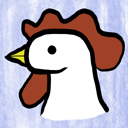


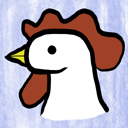

In [8]:
module Sample5 =
    open ChickenScratch.HtmlExpressions

    let doc = div {
        ScratchImage.FromResource typeof<ScratchImage>.Assembly "ChickenScratch.Resources.ChickenScratch.png"
    }

printfn "%A" Sample5.doc

Sample5.doc


Images of type .jpg, .png, and .gif are supported.

A `Prototype` element can be provided to a `ScratchImage`, and all attributes of that prototype will be added to the image.  If the prototype includes a `_class` attribute, that class will be added to the image rather than replacing the unique class that is generated for it.

If the image is going to be used multiple times, it can be split into a style and instances, so that the encoded bytes aren't repeated.


<div>
    <style>
        .scratch-image-9e58cbfe-ec4a-4187-b08f-c04e5ba9fc3d { content: url("") }
    </style>
    <ul>
        <li>
            <img class="scratch-image-9e58cbfe-ec4a-4187-b08f-c04e5ba9fc3d" style="border: solid 3px green"/>
        </li>
        <li><img class="scratch-image-9e58cbfe-ec4a-4187-b08f-c04e5ba9fc3d" width="64px"/></li>
        <li><img class="scratch-image-9e58cbfe-ec4a-4187-b08f-c04e5ba9fc3d" width="32px"/></li>
    </ul>
</div>

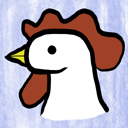


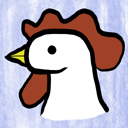

In [9]:
module Sample6 =
    open ChickenScratch.HtmlExpressions

    let myImage = 
        "ChickenScratch.Resources.ChickenScratch.png"
        |> ScratchImage.FromResource typeof<ScratchImage>.Assembly 
        |> ScratchImage.WithPrototype (img { _style "border: solid 3px green" })

    let doc = div {
        myImage.Style

        ul {
            li { myImage.Instance }
            li { myImage.WithPrototype( img { _width "64px" } ).Instance }
            li { myImage.WithPrototype( img { _width "32px" } ).Instance }
        }
    }

printfn "%A" Sample6.doc

Sample6.doc